# Introdução

Está análise tem como objetivo analise de mortalidadea nível mundial. Será comparado diversas regiões delimitadas pela Organização Mundial da Saúde(em inglês WHO).

Para está analise foi utilizada o dataset do Kaggle, disponível em: https://www.kaggle.com/datasets/madhurpant/world-deaths-and-causes-1990-2019
<br>
<br>
Link utilizados nessa análise:

- https://en.wikipedia.org/wiki/List_of_WHO_regions

- https://www.euro.who.int/__data/assets/pdf_file/0003/307272/Facsheet-malaria-elimination.pdf

- https://www.thelancet.com/journals/lanpub/article/PIIS2468-2667(19)30074-X/fulltext

Utilizaremos:
- Dataset referente a mortalidade mundial entre 1990 e  2019

## Indice de conteúdo:
* [Importando bibliotecas e carregando dados](#first-bullet)
* [Verificando a estrutura dos dados](#second-bullet)
* [Analise dos dados](#third-bullet)
    * [Alguns casos particulares interessantes](#third1-bullet)
        * [Malaria](#third1.1-bullet)
        * [Acidentes de trânsito](#third1.2-bullet)
    * [Doenças Neurodegenerativas](#third2-bullet)
        * [Alzheimer](#third2.1-bullet)
        * [Parkinson](#third2.2-bullet)
    * [Doenças Infecciosas ](#third3-bullet)
        * [Tuberculose ](#third3.1-bullet)
        * [HIV/AIDS ](#third3.2-bullet)
    * [Analise Bivariada](#third4-bullet)
        * [Correlação entre as doenças neurodegenerativas?](#third4.1-bullet)
        * [Doenças Infecciosas vs Doenças Neurodegenerativas](#third4.2-bullet)
        * [Todas as correlações](#third4.3-bullet)


# Importando bibliotecas e carregando dados <a class="anchor" id="first-bullet"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('annual_deaths_by_causes.csv')
data

,country,code,year,meningitis,alzheimer's_diesease,parkinson's_disease,nutritional_deficiency,malaria,drowning,interpersonal_violence,...,chronic_kidney_disease,poisonings,protein_energy_malnutrition,terrorism,road_injuries,chronic_respiratory_diseases,chronic_liver_diseases,digestive_diseases,fire_heat_hot_substance,acute_hepatitis
0,Afghanistan,AFG,2007,2933.0,1402.0,450.0,2488.0,393.0,2127.0,3657.0,...,4490.0,512.0,2439.0,1199.0,7425.0,7222.0,3346.0,6458.0,481.0,3437.0
1,Afghanistan,AFG,2008,2731.0,1424.0,455.0,2277.0,255.0,1973.0,3785.0,...,4534.0,495.0,2231.0,1092.0,7355.0,7143.0,3316.0,6408.0,462.0,3005.0
2,Afghanistan,AFG,2009,2460.0,1449.0,460.0,2040.0,239.0,1852.0,3874.0,...,4597.0,483.0,1998.0,1065.0,7290.0,7045.0,3291.0,6358.0,448.0,2663.0
3,Afghanistan,AFG,2011,2327.0,1508.0,473.0,1846.0,390.0,1775.0,4170.0,...,4785.0,483.0,1805.0,1525.0,7432.0,6916.0,3318.0,6370.0,448.0,2365.0
4,Afghanistan,AFG,2012,2254.0,1544.0,482.0,1705.0,94.0,1716.0,4245.0,...,4846.0,482.0,1667.0,3521.0,7494.0,6878.0,3353.0,6398.0,445.0,2264.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7268,Zimbabwe,ZWE,2015,1439.0,754.0,215.0,3019.0,2518.0,770.0,1302.0,...,2108.0,381.0,2990.0,NaN,2373.0,2751.0,1956.0,4202.0,632.0,146.0
7269,Zimbabwe,ZWE,2016,1457.0,767.0,219.0,3056.0,2050.0,801.0,1342.0,...,2160.0,393.0,3027.0,NaN,2436.0,2788.0,1962.0,4264.0,648.0,146.0
7270,Zimbabwe,ZWE,2017,1460.0,781.0,223.0,2990.0,2116.0,818.0,1363.0,...,2196.0,398.0,2962.0,0.0,2473.0,2818.0,2007.0,4342.0,654.0,144.0
7271,Zimbabwe,ZWE,2018,1450.0,795.0,227.0,2918.0,2088.0,825.0,1396.0,...,2240.0,400.0,2890.0,NaN,2509.0,2849.0,2030.0,4377.0,657.0,139.0


# Verificando a estrutura dos dados <a class="anchor" id="second-bullet"></a>

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7273 entries, 0 to 7272
Data columns (total 35 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   country                               7273 non-null   object 
 1   code                                  6206 non-null   object 
 2   year                                  7273 non-null   int64  
 3   meningitis                            6840 non-null   float64
 4   alzheimer's_diesease                  6840 non-null   float64
 5   parkinson's_disease                   6840 non-null   float64
 6   nutritional_deficiency                6840 non-null   float64
 7   malaria                               6840 non-null   float64
 8   drowning                              6840 non-null   float64
 9   interpersonal_violence                6840 non-null   float64
 10  maternal_disorders                    6840 non-null   float64
 11  hiv/aids         

Podemos verificar que, tirando a cause de morte "terrorismo", todas colunas sobre algum tipo de mortalidade apresentam valores iguais, portanto, não iremos incluir a causa de morte de "terrorismo" na análise.

Além disso, cada pais possui uma correspondência ao ano, portanto, essas duas colunas não precisam ser modificadas.

Porém, a coluna código apresenta um número esquisito, vamos tentar verificar o porquê mais pra frente.

Antes, disso porém, vamos verificar se não há nulls nas colunas, mesmo que apresentem valores iguais.

In [3]:
data.isnull().sum()

country                                    0
code                                    1067
year                                       0
meningitis                               433
alzheimer's_diesease                     433
parkinson's_disease                      433
nutritional_deficiency                   433
malaria                                  433
drowning                                 433
interpersonal_violence                   433
maternal_disorders                       433
hiv/aids                                 433
drug_use_disorders                       433
tuberculosis                             433
cardiovascular_diseases                  433
lower_respiratory_infections             433
neonatal_disorders                       433
alcohol_use_disorders                    433
self_harm                                433
exposure_to_forces_of_nature             433
diarrheal_diseases                       433
environmental_heat_and_cold_exposure     433
neoplasms 

Estranhamente, os números de nulls são iguais dentre as colunas também, o que sugere que em alguns países em anos específicos(ou talvez durante todo o período), não houve os dados para os mesmos.

Vamos verificar a estrutura desses nulls no dataset.

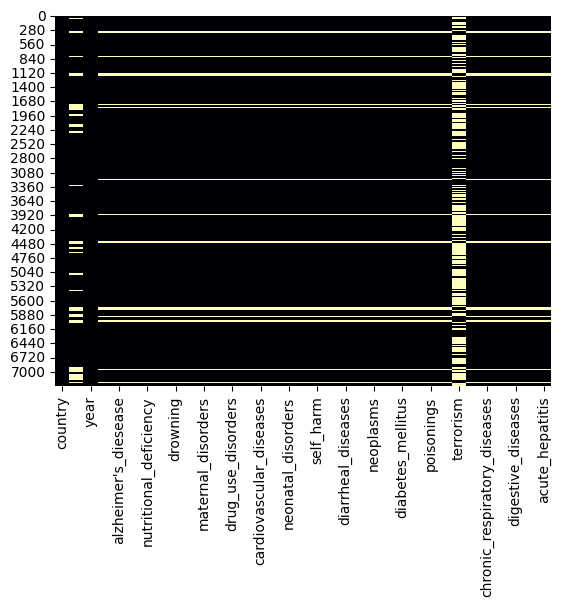

In [4]:
_= sns.heatmap(data.isnull(),cmap = "magma",cbar = False)

Com esse gráfico confirmamos que alguns países não possuem dados para a linha toda quando NULL está presente.

In [5]:
data[pd.isnull(data.drowning)].country.unique()

array(['Australasia & Oceania', 'Bosnia-Herzegovina',
       'Central America & Caribbean', 'Central Asia', 'Czechoslovakia',
       'East Asia', 'East Germany (GDR)', 'East Timor', 'Eastern Europe',
       'French Guiana', 'French Polynesia', 'Guadeloupe', 'Hong Kong',
       'International', 'Kosovo', 'Macau', 'Martinique',
       'Middle East & North Africa', 'New Caledonia', 'North America',
       'Serbia-Montenegro', 'South America', 'South Asia',
       'Southeast Asia', 'Sub-Saharan Africa', 'USSR',
       'Wallis and Futuna', 'West Germany (FRG)', 'Western Europe',
       'Western Sahara', 'World (excluding China)', 'Yugoslavia', 'Zaire'],
      dtype=object)

Como não utilizaremos nenhuma desse valores de país, não iremos mudar nada com relação as linhas que esses valores estão presentes. Porém, idealmente, caso trabalhassemos com alguns países como Russia, teriamos que verificar se linhas com valores de 'USSR' não interfiriam em alguma coisa.

In [6]:
data[pd.isnull(data.code)].country.unique()

array(['African Region (WHO)', 'Australasia & Oceania',
       'Bosnia-Herzegovina', 'Central America & Caribbean',
       'Central Asia', 'East Asia', 'East Asia & Pacific (WB)',
       'East Germany (GDR)', 'East Timor', 'Eastern Europe',
       'Eastern Mediterranean Region (WHO)', 'England',
       'Europe & Central Asia (WB)', 'European Region (WHO)', 'G20',
       'International', 'Latin America & Caribbean (WB)', 'Macau',
       'Middle East & North Africa', 'Middle East & North Africa (WB)',
       'North America', 'North America (WB)', 'Northern Ireland',
       'OECD Countries', 'Region of the Americas (WHO)', 'Scotland',
       'Serbia-Montenegro', 'South America', 'South Asia',
       'South Asia (WB)', 'South-East Asia Region (WHO)',
       'Southeast Asia', 'Sub-Saharan Africa', 'Sub-Saharan Africa (WB)',
       'Wales', 'West Germany (FRG)', 'Western Europe',
       'Western Pacific Region (WHO)', 'World (excluding China)',
       'World Bank High Income', 'World Bank Lo

Descobrimos o porquê de alguns valores de country não terem código, inclusive, todos aqueles que nós utilizaremos em nossa análise, não tem código. Porém, como essa informação não tem muita relevância para análise, essa informação fica mais como curiosidade.

O importante foi descobrir os valores de países tem NULL para a linha inteira, para verificar se nenhum das regiões que iremos trabalhar está inclusa.

# Analise dos dados <a class="anchor" id="third-bullet"></a>

In [7]:
columns_data = data.columns.values
columns_data = list(columns_data[3:])
columns_data.remove("terrorism")

In [8]:
WHO = data.loc[data.country.isin(["African Region (WHO)","Eastern Mediterranean Region (WHO)", "European Region (WHO)",
                                    "Region of the Americas (WHO)","South-East Asia Region (WHO)", "Western Pacific Region (WHO)"])]

O comando abaixo mostra todos os gráficos, e foi utilizado para se ter uma noção geral dos dados, mas vamos dar destaque a alguns deles.

In [9]:

# for doenca in columns_data:
#      plt.figure(figsize =(14,6))
#      sns.lineplot(data = WHO, y = doenca , x = "year", hue = "country").set_yscale('log')


## Alguns casos particulares interessantes  <a class="anchor" id="third1-bullet"></a>

### Malaria  <a class="anchor" id="third1.1-bullet"></a>

Primeiramente vamos falar da Malaria, é bem interessante, mas de certa forma prevísivel,  observar um maior indice de mortes nos regiões tropicas(que são quase todas pois cada região engloba em algum nível, regiões tropicas) em comparação com a região da Europa.Isso se deve, principalmente, por conta que a transmissão se dá pelo mosquito.
<br>
<br>

Porém, o que é mais interessante, é ver como a Europa, praticamente zerou o número de casos. Os detalhes de como isso aconteceu podem ser encontrados aqui:<br>
https://www.euro.who.int/__data/assets/pdf_file/0003/307272/Facsheet-malaria-elimination.pdf.

É importante estudar o que houve na Europa para que se use de exemplo,caso aplicável, para redução do número de mortes por Malária ou até sua total eliminação.

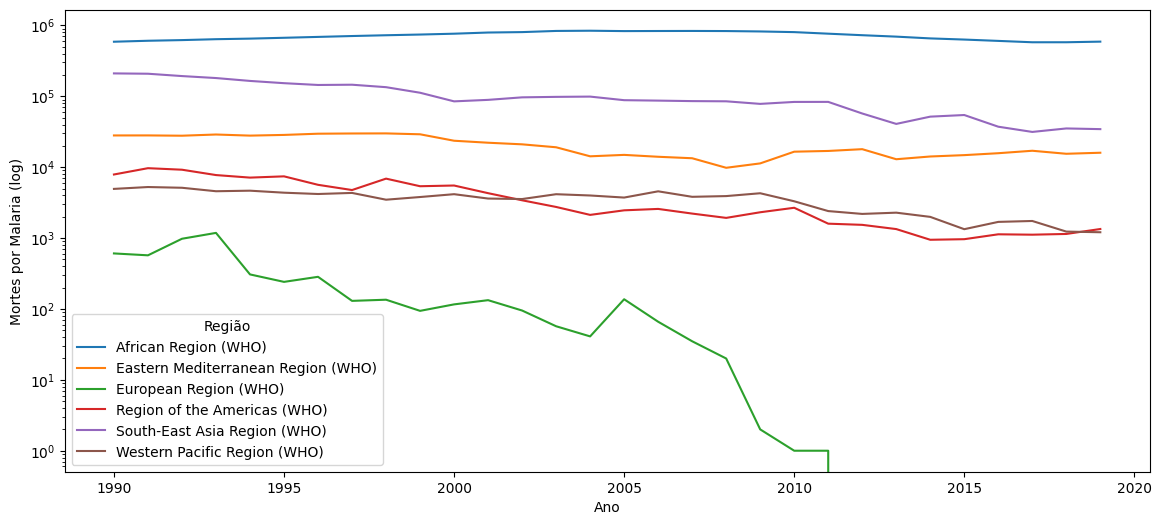

In [10]:
plt.figure(figsize = (14,6))
sns.lineplot(data = WHO, y = "malaria" , x = "year", hue = "country").set_yscale('log')
_ = plt.xlabel("Ano")
_ = plt.ylabel("Mortes por Malaria (log)")
_ = plt.legend(title = "Região")

### Acidentes de trânsito <a class="anchor" id="third1.2-bullet"></a>

Outra váriavel que a Região da Europa também se destacou, pela sua notável diminuição quando comparada as outras regiões, foi as mortes causadas por acidentes de trânsito. 

Um breve comentário que explica como a Europa diminui e pretende diminuir mais ainda esse número de mortes:<br>
https://www.thelancet.com/journals/lanpub/article/PIIS2468-2667(19)30074-X/fulltext

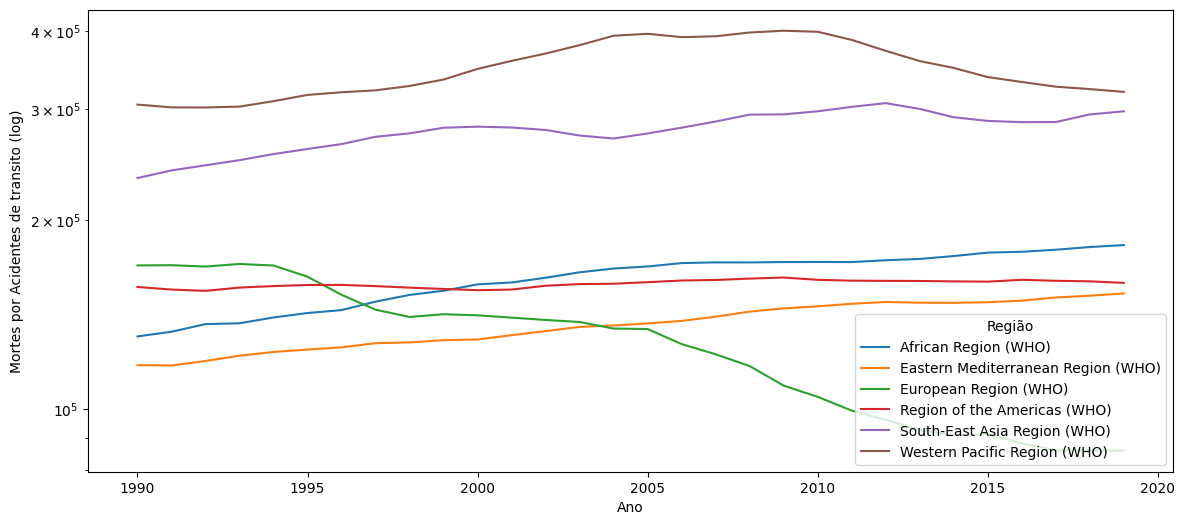

In [11]:
plt.figure(figsize = (14,6))
_ =sns.lineplot(data = WHO, y = "road_injuries" , x = "year", hue = "country").set_yscale('log')
_ = plt.xlabel("Ano")
_ = plt.ylabel("Mortes por Acidentes de transito (log)")
_ = plt.legend(title = "Região")

## Doenças Neurodegenerativas  <a class="anchor" id="third2-bullet"></a>

Até agora observamos casos que a Europa tem se destacado. Agora vamos ver algumas tendências negativas para, não só essa região mas como as regiões com países mais desenvolvidos no geral (Ex: Western Pacific Region).



### Alzheimer <a class="anchor" id="third2.1-bullet"></a>

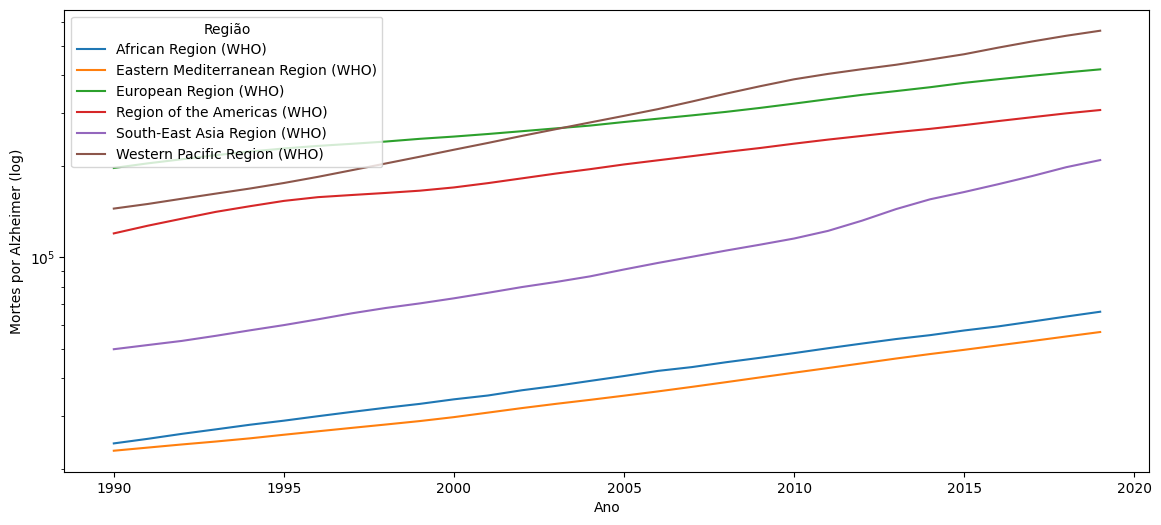

In [12]:
plt.figure(figsize = (14,6))

_ = sns.lineplot( data =WHO, y = "alzheimer's_diesease" , x = "year", hue = "country").set_yscale('log')
_ = plt.xlabel("Ano")
_ = plt.ylabel("Mortes por Alzheimer (log)")
_ = plt.legend(title = "Região")

### Parkinson  <a class="anchor" id="third2.2-bullet"></a>

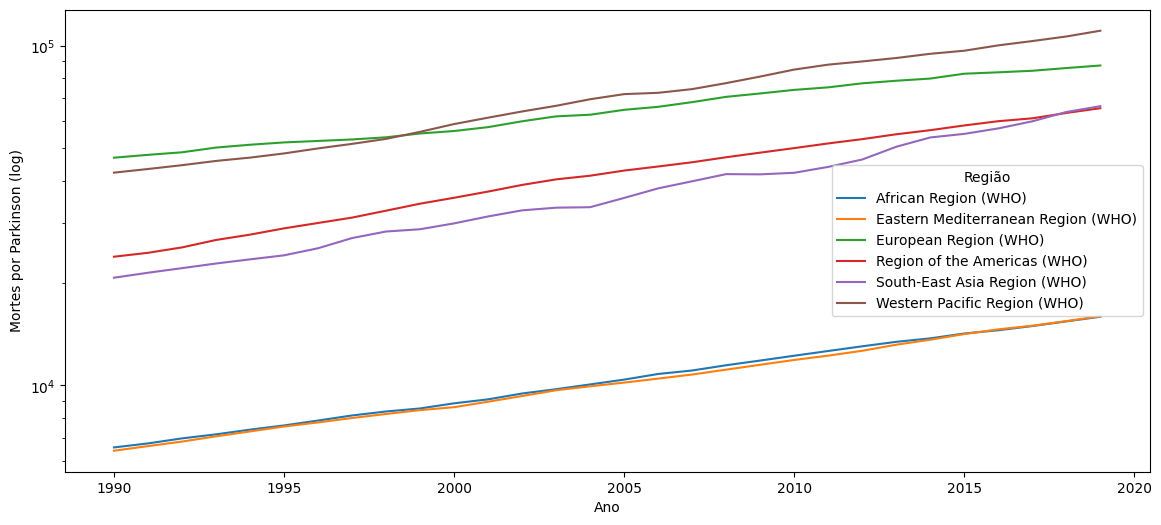

In [13]:
plt.figure(figsize = (14,6))
_ = sns.lineplot( data =WHO, y = "parkinson's_disease" , x = "year", hue = "country").set_yscale('log')
_ = plt.xlabel("Ano")
_ = plt.ylabel("Mortes por Parkinson (log)")
_ = plt.legend(title = "Região")

## Doenças Infecciosas <a class="anchor" id="third3-bullet"></a>

Já analisamos a mortalidade ligada a doenças neurodegenerativas, agora vamos analisar padrões de doenças infecciosas.

Como já vimos no caso da Malária, parece que as regiões da África(azul) e a região do Sudeste da Asia(roxo),que inclui paises como India, Bangladesh e Vietnã, parecem predominar, enquanto outra regiões como a Europa parecem ficar embaixo.

Vamos verificar se isso se repete:

### Tuberculose  <a class="anchor" id="third3.1-bullet"></a>

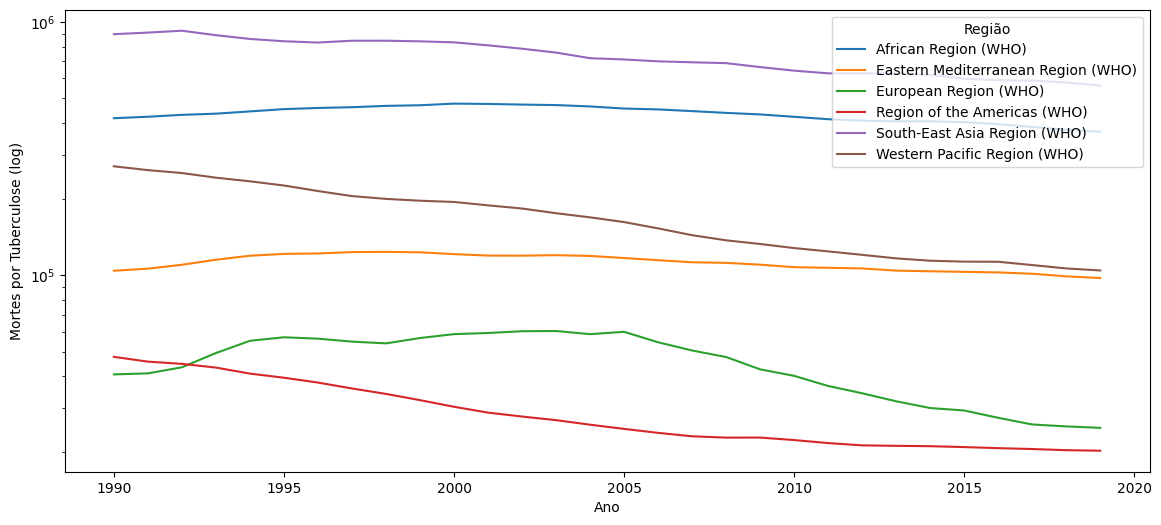

In [14]:
plt.figure(figsize = (14,6))

_ = sns.lineplot( data =WHO, y = "tuberculosis" , x = "year", hue = "country").set_yscale('log')
_ = plt.xlabel("Ano")
_ = plt.ylabel("Mortes por Tuberculose (log)")
_ = plt.legend(title = "Região")

### HIV/AIDS <a class="anchor" id="third3.2-bullet"></a>

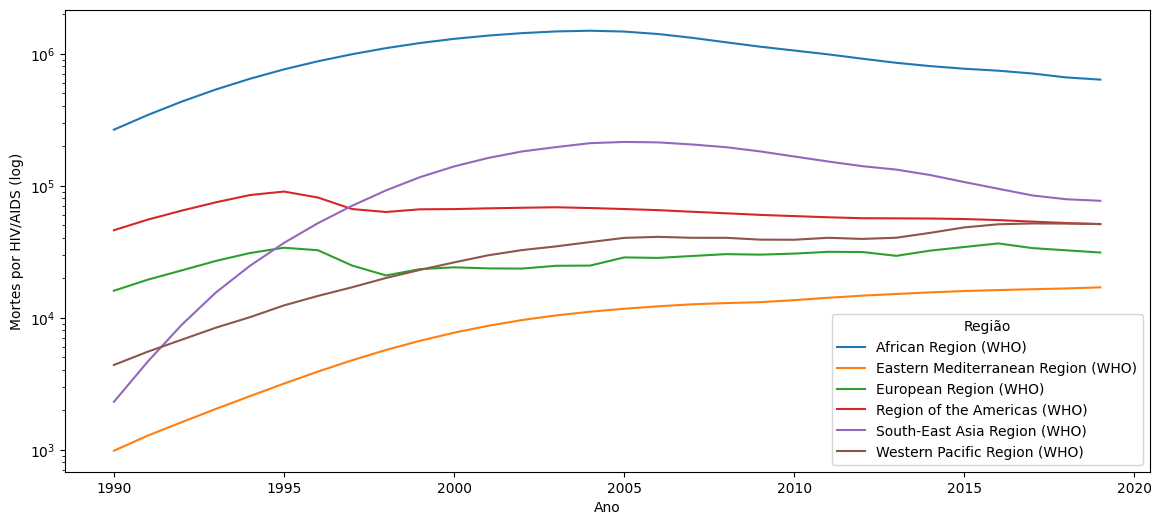

In [15]:
plt.figure(figsize = (14,6))

_= sns.lineplot( data =WHO, y = "hiv/aids" , x = "year", hue = "country").set_yscale('log')
_ = plt.xlabel("Ano")
_ = plt.ylabel("Mortes por HIV/AIDS (log)")
_ = plt.legend(title = "Região")

Aparentemente, umas das tendências em doenças infecciosas é as regiões da África(azul) e a região do Sudeste da Asia(roxo) ficarem sempre em cima, enquanto as outras regiões oscilam, mas sempre ficam abaixo destas duas.

## Análise Bivariada <a class="anchor" id="third4-bullet"></a>

### Correlação entre as doenças neurodegenerativas? <a class="anchor" id="third4.1-bullet"></a>

Quando olhamos os gráficos, das doenças neurodegerativas, podemos notar que há uma a tendência entre as regiões é praticamente igual, porém, vamos tentar verificar isso através de um scatter plot

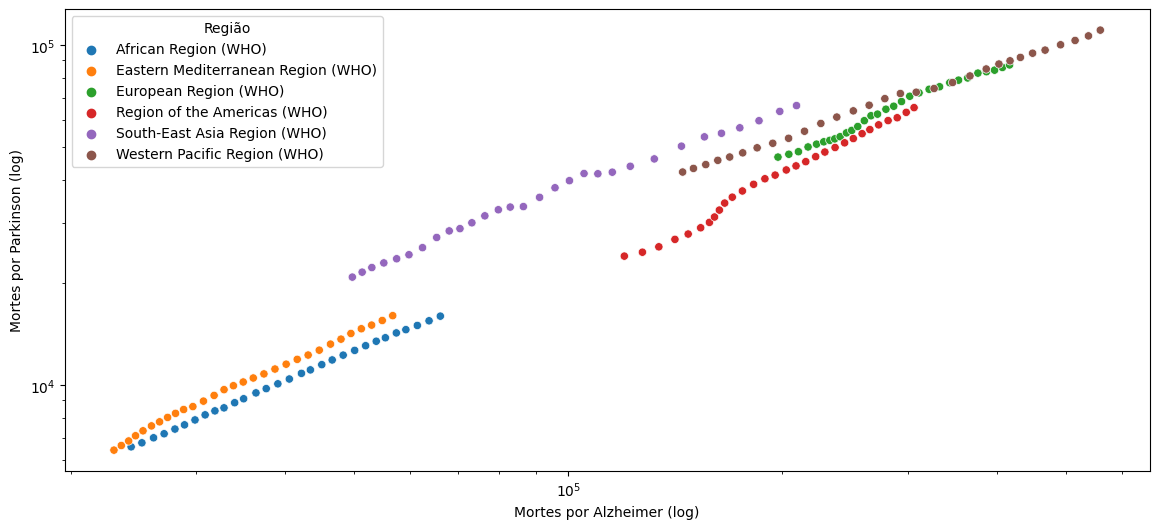

In [16]:
plt.figure(figsize = (14,6))

_ = sns.scatterplot( data = WHO, x = "alzheimer's_diesease", y = "parkinson's_disease", hue = "country").set(xscale="log", yscale="log")
_ = plt.xlabel("Mortes por Alzheimer (log)")
_ = plt.ylabel("Mortes por Parkinson (log)")
_ = plt.legend(title = "Região")

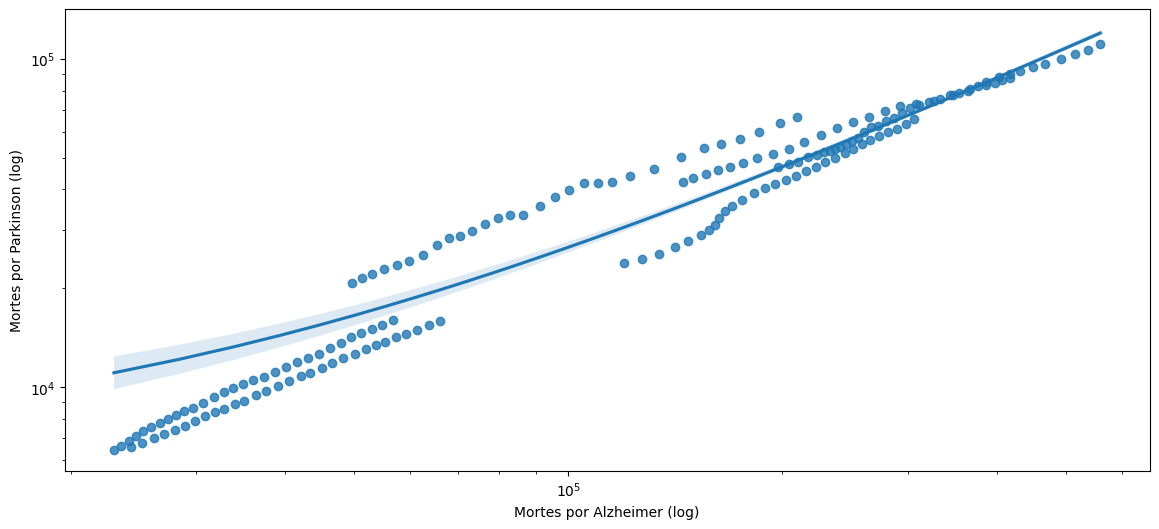

In [17]:
plt.figure(figsize = (14,6))

_ = sns.regplot( data = WHO, x = "alzheimer's_diesease", y = "parkinson's_disease").set(xscale="log", yscale="log")

_ = plt.xlabel("Mortes por Alzheimer (log)")
_ = plt.ylabel("Mortes por Parkinson (log)")


De fato, houve uma correlação entre ambas, provavelmente ligado ao fato que ambas são doenças ligadas a idade e neurodegenerativas.

### Doenças Infecciosas vs Doenças Neurodegenerativas <a class="anchor" id="third4.2-bullet"></a>

Aparantemente, principalmente quando olhamos para a região Africa, ao mesmo tempo que a mesma lidera em algumas doenças infecciosas, ela é a com menos casos nas doenças neurodegenerativas, o que sugere que pode haver um padrão de que quando uma estiver alta a outra desce(inversamente proporcional). Vamos verificar:

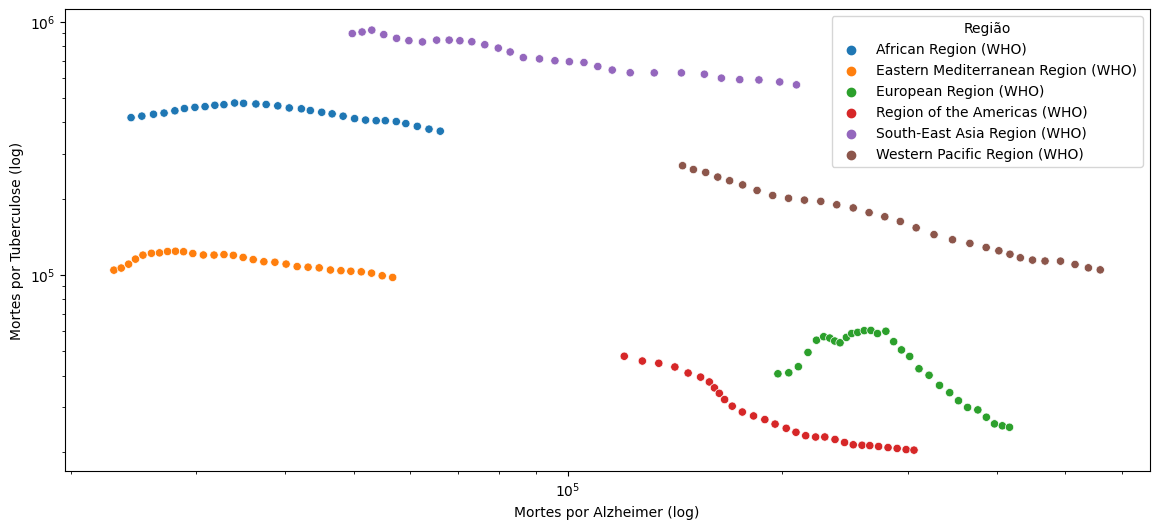

In [18]:
plt.figure(figsize = (14,6))
_ = sns.scatterplot(data = WHO, y = "tuberculosis", x = "alzheimer's_diesease", hue = "country").set(xscale="log", yscale="log")
_ = plt.ylabel("Mortes por Tuberculose (log)")
_ = plt.xlabel("Mortes por Alzheimer (log)")
_ = plt.legend(title = "Região")

Apesar de haver um padrão aparente, parece que esse padrão varia dependendo da região, portando vamos usar o lmplot em vez do regplot.

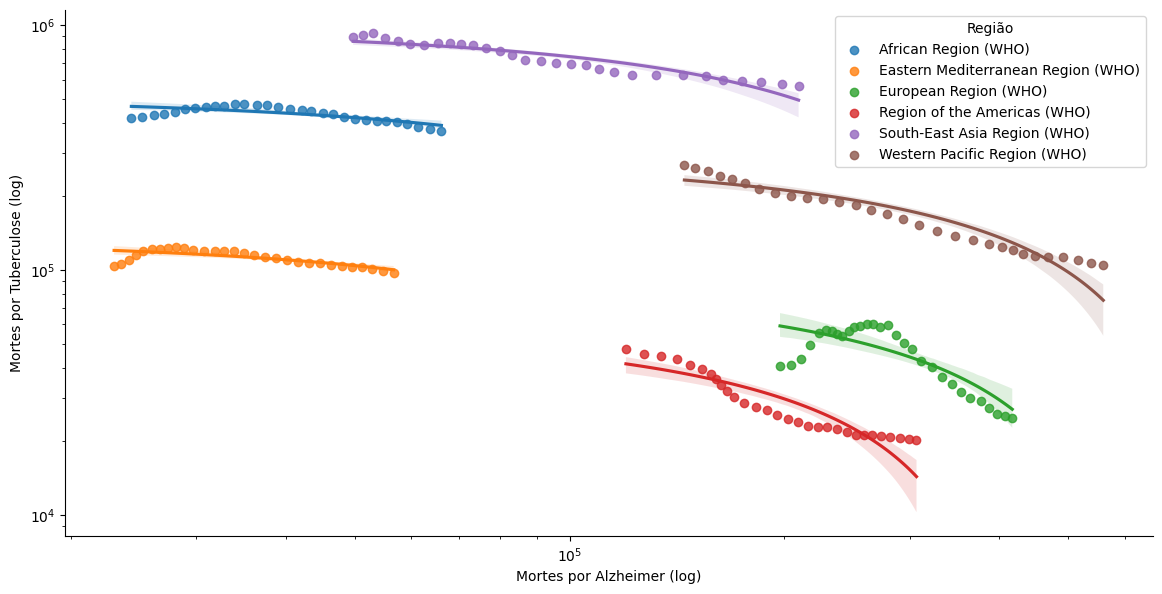

In [43]:

_  = sns.lmplot( data = WHO, y = "tuberculosis", x = "alzheimer's_diesease", hue = "country", height=6, aspect = 2, legend = False).set(xscale="log", yscale="log")
_ = plt.ylabel("Mortes por Tuberculose (log)")
_ = plt.xlabel("Mortes por Alzheimer (log)")
_ = plt.legend(title = "Região")


Aparentemente podemos verificar mesmo essa corelação, apesar que em algumas regiões isso é mais expressivo enquanto que em outras não.

Vamos verificar para outras doenças

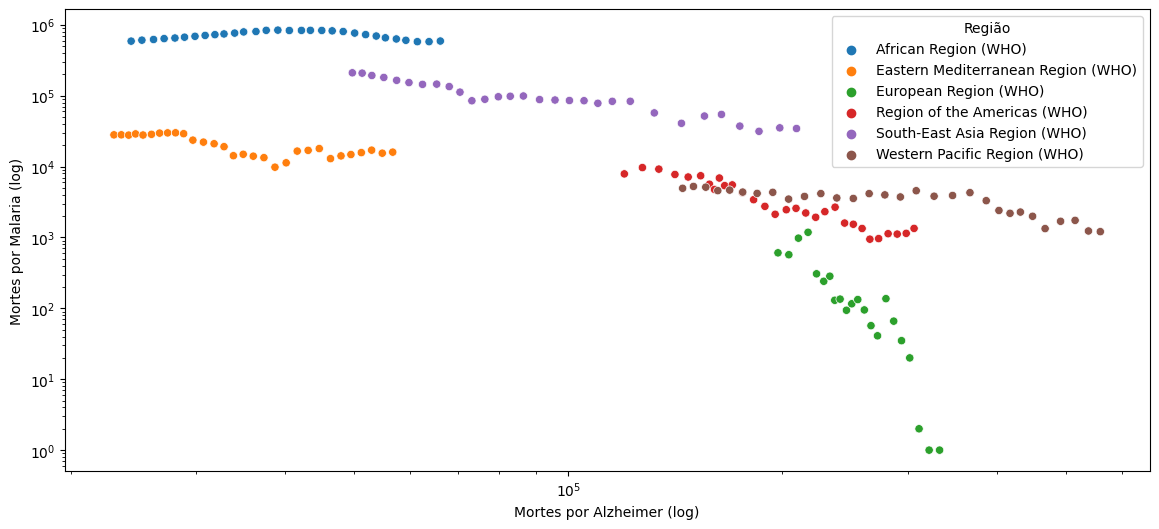

In [20]:
plt.figure(figsize = (14,6))
_ = sns.scatterplot(data = WHO, y = "malaria", x = "alzheimer's_diesease", hue = "country").set(xscale="log", yscale="log")
_ = plt.ylabel("Mortes por Malaria (log)")
_ = plt.xlabel("Mortes por Alzheimer (log)")
_ = plt.legend(title = "Região")

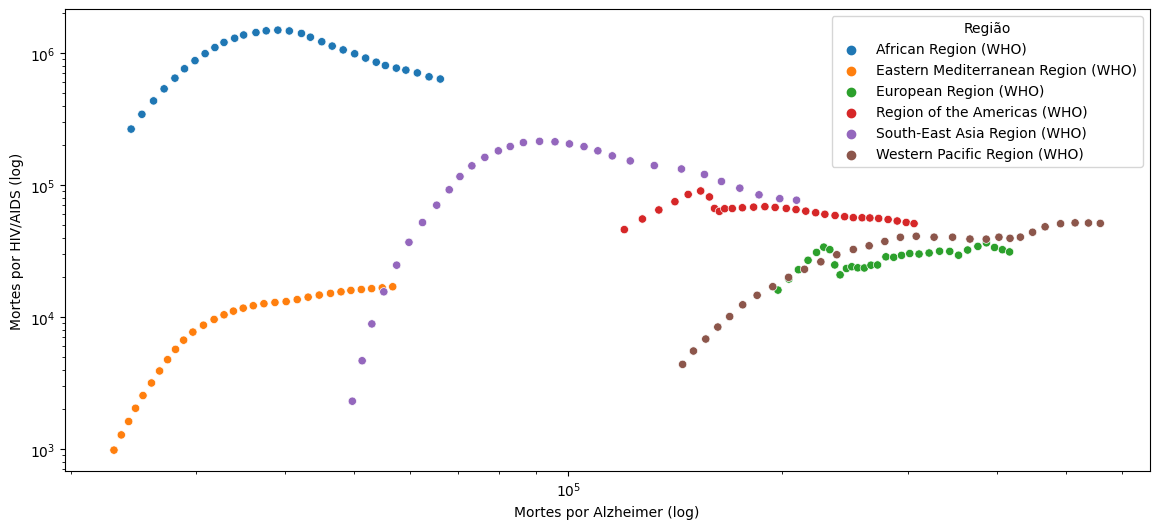

In [21]:
plt.figure(figsize = (14,6))
_ = sns.scatterplot(data = WHO, y = "hiv/aids", x = "alzheimer's_diesease", hue = "country").set(xscale="log", yscale="log")
_ = plt.ylabel("Mortes por HIV/AIDS (log)")
_ = plt.xlabel("Mortes por Alzheimer (log)")
_ = plt.legend(title = "Região")

Diferente do que esperavamos, as outras doenças infecciossa não apresentam um padrão semelhante a da tuberculose, o que sugere que aquele padrão de inversamente proporcional é exclusivo da **tuberculose** e não se repete para todas as doenças.

### Todas as correlações  <a class="anchor" id="third4.3-bullet"></a>

No futuro, se quisessemos ter um parametro melhor para buscar correlações poderiamos usar o comando:

In [22]:
WHO.corr()

/tmp/ipykernel_156/280360452.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  WHO.corr()


,year,meningitis,alzheimer's_diesease,parkinson's_disease,nutritional_deficiency,malaria,drowning,interpersonal_violence,maternal_disorders,hiv/aids,...,chronic_kidney_disease,poisonings,protein_energy_malnutrition,terrorism,road_injuries,chronic_respiratory_diseases,chronic_liver_diseases,digestive_diseases,fire_heat_hot_substance,acute_hepatitis
year,1.000000,-0.160276,0.399652,0.400480,-0.326586,-0.038039,-0.259223,-0.005983,-0.131861,0.044294,...,0.551820,-0.057999,-0.331558,NaN,0.057862,0.063038,0.257100,0.211290,-0.151840,-0.188997
meningitis,-0.160276,1.000000,-0.641397,-0.625051,0.785638,0.933624,0.026823,-0.168305,0.844198,0.846383,...,-0.338347,0.096746,0.834917,NaN,-0.042109,-0.198859,-0.044732,-0.093175,0.366077,0.417423
alzheimer's_diesease,0.399652,-0.641397,1.000000,0.973375,-0.530939,-0.485070,0.126345,0.143530,-0.643648,-0.395211,...,0.616831,0.420317,-0.549466,NaN,0.293944,0.405245,0.294583,0.403317,-0.104490,-0.455054
parkinson's_disease,0.400480,-0.625051,0.973375,1.000000,-0.475240,-0.524450,0.286918,0.077336,-0.553067,-0.435668,...,0.707009,0.432486,-0.510218,NaN,0.419492,0.564390,0.491366,0.582974,0.051845,-0.287212
nutritional_deficiency,-0.326586,0.785638,-0.530939,-0.475240,1.000000,0.579916,0.338946,-0.062096,0.907902,0.446565,...,-0.125941,-0.045783,0.992564,NaN,0.099140,0.015911,0.176272,0.173525,0.441370,0.706060
malaria,-0.038039,0.933624,-0.485070,-0.524450,0.579916,1.000000,-0.199944,-0.048935,0.629527,0.951212,...,-0.379119,0.176760,0.658417,NaN,-0.168214,-0.347810,-0.216073,-0.238318,0.213893,0.083418
drowning,-0.259223,0.026823,0.126345,0.286918,0.338946,-0.199944,1.000000,-0.200390,0.308783,-0.230048,...,0.429117,0.433293,0.272465,NaN,0.816680,0.881498,0.709269,0.723898,0.514175,0.618417
interpersonal_violence,-0.005983,-0.168305,0.143530,0.077336,-0.062096,-0.048935,-0.200390,1.000000,-0.187425,0.016187,...,0.224168,-0.363737,-0.041676,NaN,-0.187444,-0.187219,-0.099873,-0.009610,-0.285380,-0.308065
maternal_disorders,-0.131861,0.844198,-0.643648,-0.553067,0.907902,0.629527,0.308783,-0.187425,1.000000,0.527740,...,-0.095331,-0.087920,0.894336,NaN,0.141218,0.040375,0.281731,0.222877,0.530577,0.802057
hiv/aids,0.044294,0.846383,-0.395211,-0.435668,0.446565,0.951212,-0.230048,0.016187,0.527740,1.000000,...,-0.305055,0.170003,0.526971,NaN,-0.144960,-0.319146,-0.185110,-0.208419,0.173563,0.008334
